<center><h1>Module 2 Assignment</h1></center>

# Choose a dataset

Choose a dataset from [NYC Open Data](https://opendata.cityofnewyork.us/) that is available in CSV format (look at the format labels in the list of datasets). Choose one that has at least 2 numerical value columns and 1 string value column. 

If it's a CSV file you may be able to directly read it with pandas
```
pd.read_csv(url)
```

If it is a compressed file (.zip, .gz, etc.), download the zip and unpack it, then read it in with pandas
```
pd.read_csv(<filename>.csv)
```

In [119]:
import pandas as pd
import seaborn as sns

In [120]:
df = pd.read_csv('https://data.cityofnewyork.us/resource/f9bf-2cp4.csv')

## Display top 7 rows of the dataframe in your notebook

In [121]:
df.head(7)

,dbn,school_name,num_of_sat_test_takers,sat_critical_reading_avg_score,sat_math_avg_score,sat_writing_avg_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525


## Count number of null values (if any) for each column

In [122]:
df.isna().sum()

dbn                               0
school_name                       0
num_of_sat_test_takers            0
sat_critical_reading_avg_score    0
sat_math_avg_score                0
sat_writing_avg_score             0
dtype: int64

## Remove all but 2 numerical values columns of your choice and display the reducted dataframe.

In [123]:
df.columns

Index(['dbn', 'school_name', 'num_of_sat_test_takers',
       'sat_critical_reading_avg_score', 'sat_math_avg_score',
       'sat_writing_avg_score'],
      dtype='object')

In [124]:
df_reducted = df[['sat_critical_reading_avg_score','sat_writing_avg_score']]
df_reducted = df_reducted[~df_reducted.sat_critical_reading_avg_score.str.contains("s")]
df_reducted

,sat_critical_reading_avg_score,sat_writing_avg_score
0,355,363
1,383,366
2,377,370
3,414,359
4,390,384
...,...,...
466,347,350
467,359,358
471,429,433
476,496,426


## Display the average, median, and standard deviation of each of your numerical columns

In [125]:
df_reducted = df_reducted.apply(pd.to_numeric)

In [157]:
average=df_reducted.mean(axis=0)
median=df_reducted.median(axis=0)
std=df_reducted.std(axis=0)
print("AVERAGE : ")
print(average)
print("MEDIAN : ")
print(median)
print("STANDAR DEVIATION : ")
print(std)

AVERAGE : 
sat_critical_reading_avg_score       400.850356
sat_writing_avg_score                393.985748
power_of_two_sat_writing          158654.679335
dtype: float64
MEDIAN : 
sat_critical_reading_avg_score       391.0
sat_writing_avg_score                381.0
power_of_two_sat_writing          145161.0
dtype: float64
STANDAR DEVIATION : 
sat_critical_reading_avg_score       56.802783
sat_writing_avg_score                58.635109
power_of_two_sat_writing          53306.078065
dtype: float64


## Plot two of the numerical columns one against the other in a scatter plot

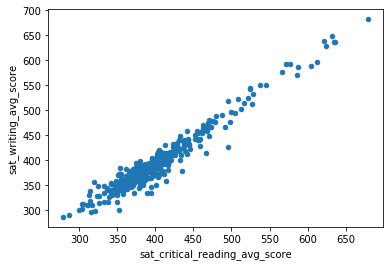

In [127]:
ax1 = df_reducted.plot.scatter(x='sat_critical_reading_avg_score',y='sat_writing_avg_score')

## Plot the data distribution of all your numerical columns in histogram and boxplot

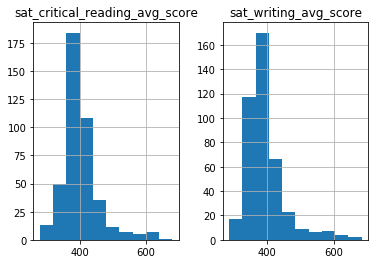

In [128]:
histogram=df_reducted.hist(bins=10)

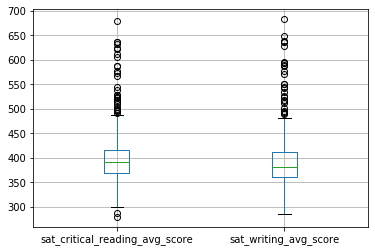

In [129]:
boxplot=df_reducted.boxplot()

## Create a new column in the same dataframe that is raised power of two of an existing column
Example:
![power_of_two](images/ex1.jpeg)


In [130]:
df_reducted["power_of_two_sat_writing"]=df_reducted["sat_writing_avg_score"]**2

In [131]:
df_reducted

,sat_critical_reading_avg_score,sat_writing_avg_score,power_of_two_sat_writing
0,355,363,131769
1,383,366,133956
2,377,370,136900
3,414,359,128881
4,390,384,147456
...,...,...,...
466,347,350,122500
467,359,358,128164
471,429,433,187489
476,496,426,181476


# Citi Bike investigation
![citi-bike](images/citibike.jpeg)
>Citi Bike is the largest bike share program in the US, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Choose a citibikes dataset (one or two months, earlier datasets are convenient because they are smaller)

Example for downloading September 2017 Citibike data:
```
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

In [132]:
citibikes=pd.read_csv('https://s3.amazonaws.com/tripdata/201709-citibike-tripdata.csv.zip')

In [133]:
citibikes

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,1
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,1
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,1
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,1
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878093,621,2017-09-30 23:59:30,2017-10-01 00:09:52,3366,West End Ave & W 107 St,40.802117,-73.968181,3540,Morningside Ave & W 123 St,40.810000,-73.955151,28812,Subscriber,1980.0,2
1878094,656,2017-09-30 23:59:33,2017-10-01 00:10:30,3163,Central Park West & W 68 St,40.773407,-73.977825,479,9 Ave & W 45 St,40.760193,-73.991255,19088,Subscriber,1986.0,1
1878095,516,2017-09-30 23:59:40,2017-10-01 00:08:16,3224,W 13 St & Hudson St,40.739974,-74.005139,382,University Pl & E 14 St,40.734927,-73.992005,29922,Subscriber,NaN,0
1878096,1039,2017-09-30 23:59:49,2017-10-01 00:17:08,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,3336,E 97 St & Madison Ave,40.787801,-73.953559,26007,Subscriber,1990.0,1


## Count the number of missing values of each column

In [134]:
citibikes.isna().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 207468
gender                          0
dtype: int64

## Who rides citibikes? Show ridership distribution by gender, user type, and age
Process the data and plot your answers

#### Distribution by age

In [135]:
citibikes['age']=2017-citibikes['birth year']
citibikes_age=citibikes.groupby(["age"])["bikeid"].count().reset_index(name="count")

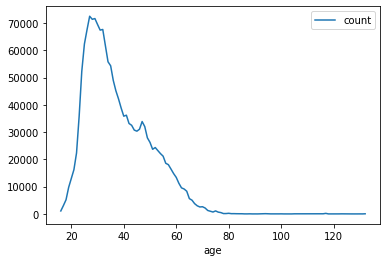

In [136]:
citibikes_age.plot(x ='age', y='count', kind = 'line')

#### Distribution by usertype

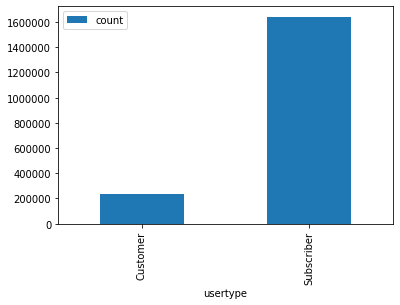

In [137]:
citibikes_type=citibikes.groupby(["usertype"])["bikeid"].count().reset_index(name="count")
citibikes_type.plot(x ='usertype', y='count', kind = 'bar')

#### Distribution by gender

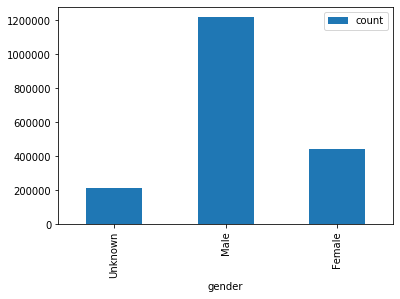

In [167]:
citibikes_type=citibikes.groupby(["gender"])["bikeid"].count().reset_index(name="count")

citibikes_type['gender']=citibikes_type['gender'].replace({0: 'Unknown'})
citibikes_type['gender']=citibikes_type['gender'].replace({1: 'Male'})
citibikes_type['gender']=citibikes_type['gender'].replace({2: 'Female'})
#citibikes_type[["gender"]] = df[["gender"]].replace([0, 1, 2], ["Unknown", "Male", "Female"])
citibikes_type.plot(x ='gender', y='count', kind = 'bar')

## What is the average number of trips per day?

In [139]:
citibikes['starttime'] = pd.to_datetime(citibikes['starttime'])
citibikes['date'] = citibikes['starttime'].dt.date

In [140]:
trip_per_day=citibikes.groupby('date').size()

In [141]:
print("average number of trips per day : ",trip_per_day.mean(axis=0))

average number of trips per day :  62603.26666666667


## What is the average trip duration?

In [142]:
print("average trip duration : ",citibikes['tripduration'].mean(axis=0))

average trip duration :  997.0888920599458


## What days of the week are most rides taken on?
Process the data and plot your answer

In [143]:
citibikes['date'] = pd.to_datetime(citibikes['date'])
citibikes['day'] = citibikes['date'].dt.day_name()

In [144]:
riders_per_day=citibikes.groupby(["day"])["bikeid"].count().reset_index(name="count")
riders_per_day

,day,count
0,Friday,334056
1,Monday,260532
2,Saturday,271843
3,Sunday,209091
4,Thursday,280215
5,Tuesday,269453
6,Wednesday,252908


In [145]:
day_answer=riders_per_day.iloc[riders_per_day['count'].idxmax()]

In [146]:
print("menurut analisis data, terlihat bahwa pengguna paling banyak bersepeda pada saat hari")
print(day_answer)

menurut analisis data, terlihat bahwa pengguna paling banyak bersepeda pada saat hari
day      Friday
count    334056
Name: 0, dtype: object


## What hour of the day are most rides taken on?
Process the data and plot your answer

In [147]:
citibikes['hour'] = citibikes['starttime'].dt.hour

In [148]:
riders_per_hour=citibikes.groupby(["hour"])["bikeid"].count().reset_index(name="count")
riders_per_hour

,hour,count
0,0,16915
1,1,9317
2,2,5268
3,3,3149
4,4,3213
5,5,10807
6,6,39871
7,7,87898
8,8,146721
9,9,112511


In [149]:
hour_answer=riders_per_hour.iloc[riders_per_hour['count'].idxmax()]

In [150]:
print("menurut analisis data, terlihat bahwa pengguna mulai bersepeda paling banyak pada saat jam")
print(hour_answer)

menurut analisis data, terlihat bahwa pengguna mulai bersepeda paling banyak pada saat jam
hour         17
count    185563
Name: 17, dtype: int64


## Is there correlation between age and trip duration?

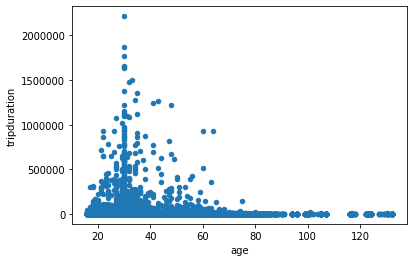

In [151]:
ax2 = citibikes.plot.scatter(x='age',y='tripduration')

In [152]:
citibikes['age'].corr(citibikes['tripduration'])

-0.004167567478677345

### menurut correlation matrix, tidak ada korelasi antara umur dengan trip duration

## What are the top 10 pair of stations that our riders use as a start & stopping point?

In [153]:
top_pair=citibikes.groupby(['start station name','end station name']).size().sort_values(ascending=False).reset_index(name='count')

In [154]:
top_pair.head(10)

,start station name,end station name,count
0,Central Park S & 6 Ave,Central Park S & 6 Ave,856
1,12 Ave & W 40 St,West St & Chambers St,781
2,E 7 St & Avenue A,Cooper Square & E 7 St,770
3,Central Park S & 6 Ave,5 Ave & E 88 St,701
4,Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,578
5,West St & Chambers St,12 Ave & W 40 St,562
6,Soissons Landing,Soissons Landing,560
7,Picnic Point,Soissons Landing,558
8,Pier 40 - Hudson River Park,West St & Chambers St,549
9,12 Ave & W 40 St,Pier 40 - Hudson River Park,538


## Come up with your own question on the Citibike data usage and formulate a hypothesis

### Example:
### "Women are less likely than men to choose biking for commuting."
>
>Null Hypothesis: 

>The proportion of men biking on weekends is the same or higher than the proportion of women biking on weekends



### Asumsi :
### "Pengguna dengan tipe subscriber memiliki durasi trip lebih lama"
>Null Hypothesis:
>"rata-rata durasi trip untuk subscriber lebih tinggi dibanding customer on weekdays"

## Work with your dataset and show your findings to help answer your question

In [155]:
answer = citibikes[citibikes["day"].str.contains("Saturday|Sunday")==False]

In [156]:
type_average_weekdays=answer.groupby(["usertype"])["tripduration"].mean().reset_index(name="average")
type_average_weekdays

,usertype,average
0,Customer,2322.163187
1,Subscriber,807.672312


### Berdasarkan analisis data, terlihat bahwa pengguna dengan tipe subscriber memiliki durasi trip lebih sedikit dibanding tipe customer di weekdays

# Submit Instructions
Rename this notebook to `mod2_<first_name>_<last_name>.ipynb` and push this to your branch in module-2 repository

```
git checkout -b tanyani
git add mod2_tanya_nabila.ipynb
git commit -m 'submit mod2 assignment for Tanya Nabila'
git push
```